<a href="https://colab.research.google.com/github/danielasberna/modulo19/blob/main/Pratique_M19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # é um módulo dentro do SciPy que fornece diversas funções estatísticas e distribuições de probabilidade
from scipy.stats import norm # é uma das distribuições de probabilidade disponíveis nesse módulo e representa a distribuição normal

In [ ]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


Como a hipótese alternativa (H1) utiliza o sinal de "maior que" (>), este é um teste unilateral à direita.

In [ ]:
# Calculando as médias das amostras
media_amostra_A = np.mean(amostra_estrategia_A)
media_amostra_B = np.mean(amostra_estrategia_B)

# Calculando as variâncias das amostras
variancia_amostra_A = np.var(amostra_estrategia_A)
variancia_amostra_B = np.var(amostra_estrategia_B)

print(f"Média da amostra da Estratégia A: {media_amostra_A:.2f}")
print(f"Média da amostra da Estratégia B: {media_amostra_B:.2f}")
print(f"Variância da amostra da Estratégia A: {variancia_amostra_A:.2f}")
print(f"Variância da amostra da Estratégia B: {variancia_amostra_B:.2f}")

# Insights
print("\nInsights:")
if media_amostra_B > media_amostra_A:
    print("A média da amostra da Estratégia B é maior que a da Estratégia A.")
else:
    print("A média da amostra da Estratégia A é maior ou igual à da Estratégia B.")

if variancia_amostra_B > variancia_amostra_A:
    print("A variância da amostra da Estratégia B é maior que a da Estratégia A, indicando maior dispersão nas notas.")
else:
    print("A variância da amostra da Estratégia A é maior ou igual à da Estratégia B, indicando menor ou igual dispersão nas notas.")

Média da amostra da Estratégia A: 71.41
Média da amostra da Estratégia B: 74.75
Variância da amostra da Estratégia A: 126.68
Variância da amostra da Estratégia B: 108.26

Insights:
A média da amostra da Estratégia B é maior que a da Estratégia A.
A variância da amostra da Estratégia A é maior ou igual à da Estratégia B, indicando menor ou igual dispersão nas notas.


In [ ]:
alpha = 0.05

n_estrategia_A = len(amostra_estrategia_A)
n_estrategia_B = len(amostra_estrategia_B)

estatistica_z = (media_amostra_B - media_amostra_A) / np.sqrt(variancia_amostra_A/n_estrategia_A + variancia_amostra_B/n_estrategia_B)

p_valor = 1 - norm.cdf(estatistica_z)

print(f"Estatística do teste Z: {estatistica_z:.4f}")
print(f"P-valor: {p_valor:.4f}")

print("\nDecisão:")
if p_valor < alpha:
    print(f"Como o p-valor ({p_valor:.4f}) é menor que o nível de significância ({alpha}), rejeitamos a hipótese nula.")
    print("Isso sugere que há evidências estatísticas suficientes para concluir que a média das notas da Estratégia B é significativamente maior que a da Estratégia A.")
else:
    print(f"Como o p-valor ({p_valor:.4f}) é maior ou igual ao nível de significância ({alpha}), não rejeitamos a hipótese nula.")
    print("Não há evidências estatísticas suficientes para concluir que a média das notas da Estratégia B é significativamente maior que a da Estratégia A.")

Estatística do teste Z: 1.5422
P-valor: 0.0615

Decisão:
Como o p-valor (0.0615) é maior ou igual ao nível de significância (0.05), não rejeitamos a hipótese nula.
Não há evidências estatísticas suficientes para concluir que a média das notas da Estratégia B é significativamente maior que a da Estratégia A.


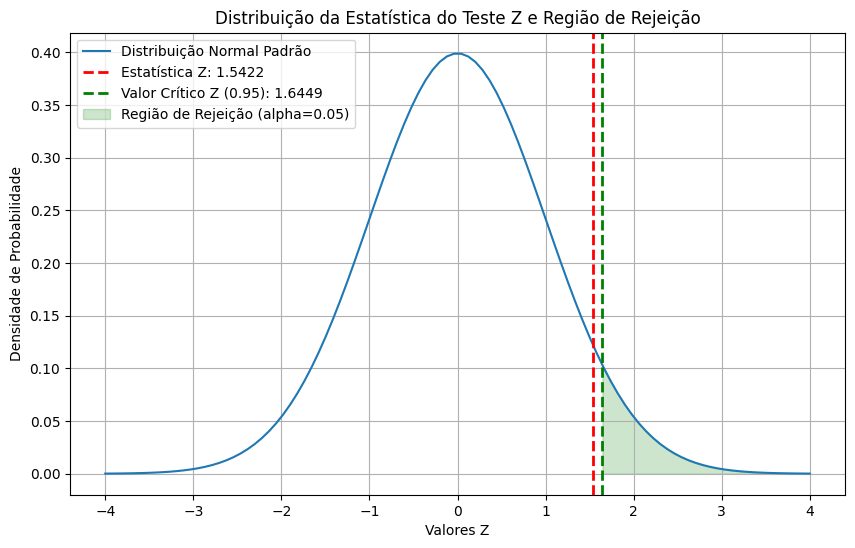


Explicação do Gráfico:
O gráfico mostra a distribuição normal padrão (curva azul), que é a distribuição esperada para a estatística do teste Z sob a hipótese nula.
A linha tracejada vermelha marca a estatística Z calculada a partir dos nossos dados (1.5422).
A linha tracejada verde marca o valor crítico Z (1.6449) para um nível de significância de 0.05 em um teste unilateral à direita. Este valor separa a região de não rejeição da região de rejeição.
A área sombreada em verde à direita do valor crítico representa a região de rejeição da hipótese nula.
Nossa decisão foi baseada na comparação do p-valor (0.0615) com o nível de significância (0.05).
Como a estatística Z (1.5422) não está na região de rejeição (ou o p-valor é maior ou igual a alpha), não rejeitamos a hipótese nula.
Isso significa que, com base neste teste e nível de significância, não temos evidências suficientes para concluir que a Estratégia B é significativamente melhor que a Estratégia A.


In [ ]:

plt.figure(figsize=(10, 6))

x = np.linspace(-4, 4, 100)

plt.plot(x, norm.pdf(x, 0, 1), label='Distribuição Normal Padrão')

plt.axvline(estatistica_z, color='red', linestyle='dashed', linewidth=2, label=f'Estatística Z: {estatistica_z:.4f}')

valor_critico_z = norm.ppf(1 - alpha)
plt.axvline(valor_critico_z, color='green', linestyle='dashed', linewidth=2, label=f'Valor Crítico Z ({1-alpha}): {valor_critico_z:.4f}')

x_rejeicao = np.linspace(valor_critico_z, 4, 100)
plt.fill_between(x_rejeicao, norm.pdf(x_rejeicao, 0, 1), color='green', alpha=0.2, label='Região de Rejeição (alpha=0.05)')

plt.title('Distribuição da Estatística do Teste Z e Região de Rejeição')
plt.xlabel('Valores Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

# Explicação do gráfico
print("\nExplicação do Gráfico:")
print(f"O gráfico mostra a distribuição normal padrão (curva azul), que é a distribuição esperada para a estatística do teste Z sob a hipótese nula.")
print(f"A linha tracejada vermelha marca a estatística Z calculada a partir dos nossos dados ({estatistica_z:.4f}).")
print(f"A linha tracejada verde marca o valor crítico Z ({valor_critico_z:.4f}) para um nível de significância de {alpha} em um teste unilateral à direita. Este valor separa a região de não rejeição da região de rejeição.")
print(f"A área sombreada em verde à direita do valor crítico representa a região de rejeição da hipótese nula.")
print(f"Nossa decisão foi baseada na comparação do p-valor ({p_valor:.4f}) com o nível de significância ({alpha}).")
if p_valor < alpha:
    print(f"Como a estatística Z ({estatistica_z:.4f}) está na região de rejeição (ou o p-valor é menor que alpha), rejeitamos a hipótese nula.")
else:
    print(f"Como a estatística Z ({estatistica_z:.4f}) não está na região de rejeição (ou o p-valor é maior ou igual a alpha), não rejeitamos a hipótese nula.")
print("Isso significa que, com base neste teste e nível de significância, não temos evidências suficientes para concluir que a Estratégia B é significativamente melhor que a Estratégia A.")

In [ ]:
# Conclusão do Teste Z
print(f"Com base no teste Z realizado com nível de significância de {alpha}:")
print(f"\nA estatística do teste Z calculada foi de {estatistica_z:.4f}.")
print(f"O p-valor obtido foi de {p_valor:.4f}.")
print(f"O valor crítico Z para um teste unilateral à direita com alpha={alpha} é de {valor_critico_z:.4f}.")
print(f"\nComo o p-valor ({p_valor:.4f}) é maior que o nível de significância ({alpha}), não rejeitamos a hipótese nula.")
print("\nConclusão: Não há evidências estatísticas suficientes, com base neste teste e nível de significância, para concluir que a média das notas da Estratégia B é significativamente maior que a da Estratégia A. Embora a média da amostra da Estratégia B tenha sido maior, a diferença não foi estatisticamente significativa ao nível de 5%.")

Com base no teste Z realizado com nível de significância de 0.05:

A estatística do teste Z calculada foi de 1.5422.
O p-valor obtido foi de 0.0615.
O valor crítico Z para um teste unilateral à direita com alpha=0.05 é de 1.6449.

Como o p-valor (0.0615) é maior que o nível de significância (0.05), não rejeitamos a hipótese nula.

Conclusão: Não há evidências estatísticas suficientes, com base neste teste e nível de significância, para concluir que a média das notas da Estratégia B é significativamente maior que a da Estratégia A. Embora a média da amostra da Estratégia B tenha sido maior, a diferença não foi estatisticamente significativa ao nível de 5%.
